https://stepik.org/lesson/1576168/step/8

**Подвиг 6**. На рисунке в пространстве признаков $(x_1 ,x_2)$ изображены образы двух классов и проведены три разделяющие линии через точки с обозначенными координатами:

<img src='https://ucarecdn.com/cec7effa-6015-428b-8ae6-f813355d4866/' width=450>

Эту задачу классификации предполагается реализовать с помощью простой двухслойной модели нейронной сети c пороговыми функциями активации:

<img src='https://ucarecdn.com/e270bcc5-de51-4334-bec9-1cc388869770/' width=450>

Необходимо по первому рисунку вычислить (вручную) значения коэффициентов, при которых модель нейронной сети будет описывать изображенные разделяющие линии и на выходе выдавать значения +1 для одного класса образов и -1 - для другого класса образов. Вычисленные коэффициенты сохраните в тензорах:
```
W1 = torch.tensor([(w11, w12), (w21, w22), (w31, w32)], dtype=torch.float32)
bias1 = torch.tensor([w10, w20, w30], dtype=torch.float32)
W2 = torch.tensor([w1, w2, w3], dtype=torch.float32)
bias2 = torch.tensor([w0], dtype=torch.float32)
```
Вычислите выходные значения для набора образов тензора `X`:
```
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)
```
Результат сохраните в одномерном тензоре **predict** длиной `batch_size`.

Замечание: в текущей версии PyTorch транспонирование матриц выполняется не с помощью свойства `t.mT`, а с помощью метода `t.transpose()` следующим образом:
```
WT = W.transpose(1,0) # меняет строки на столбцы
```
P.S. На экран ничего выводить не нужно.

In [ ]:
# @title На сдачу с готовыми весами
import torch


# тензор X в программе не менять
batch_size = 32 # количество входных данных
X = torch.tensor(list(map(float, input().split())), dtype=torch.float32).view(batch_size, 2)

# Готовые вычисленные веса первого слоя
W1 = torch.tensor([[-0.3577,  0.8049],
        [-1.6566,  1.2424],
        [ 3.0000,  1.0000]])
bias1 = torch.tensor([-11/3, -41/9, 18.0]) # фиксировали из графика

# Класс 1 должен находиться выше двух верхних прямых либо ниже нижней прямой
# Инертируем выход третьего нейрона
W2 = torch.tensor([1.0, 1.0, -1.0])
# И добавляем смещение, подойдёт любое в интервале (1.0: 3.0]
bias2 = torch.tensor([2.0])

# Функция активации общая для всех трёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

# Находим выход скрытого слоя
h = act(X @ W1.t() + bias1)

# Находим выход выходного слоя
predict = act(h @ W2 + bias2)
# predict

A.shape: torch.Size([3, 2, 2]) b.shape: torch.Size([3, 2])
W1 = tensor([[-0.3577,  0.8049],
        [-1.6566,  1.2424],
        [ 3.0000,  1.0000]])
bias1 = tensor([-3.6667, -4.5556, 18.0000])
W2 = tensor([ 1.,  1., -1.])
bias2 = tensor([3.])


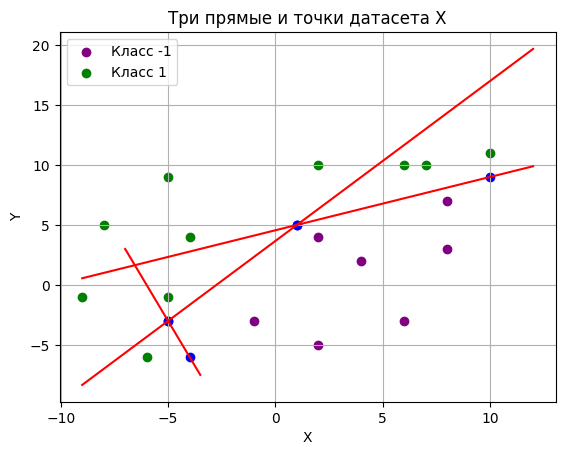

In [ ]:
# @title Тестовое решение с нахождением весов и грфиком
import torch


'''Сначала найдём веса'''
# Координаты точек на двух прямых
a1 = torch.tensor([[1.0, 5.0], [10.0, 9.0]]) # Точки на верхней прямой
a2 = torch.tensor([[-5.0, -3.0], [1.0, 5.0]]) # Точки на средней прямой
a3 = torch.tensor([[-5.0, -3.0], [-4.0, -6.0]]) # Точки на нижней прямой

# Формируем матрицу A и вектор b (для всех трёх прямых)
# Фиксируем bias01, bias02 и bias03 = -11/3, -41/9, 18.0 (для красоты считаем в онлайн-калькуляторе)
b = torch.tensor([[11/3, 41/9, -18.0],
                  [11/3, 41/9, -18.0]
                  ]).t() # Правая часть (при переносе знак меняется)
# Матрица A будет содержать только w1 и w2 (для всех трёх прямых)
A = torch.stack([a1, a2, a3])
print('A.shape:', A.shape, 'b.shape:', b.shape)

# Решаем систему уравнений для w1 и w2
solution = torch.linalg.solve(A, b)

# Извлекаааем коэффициенты из решения и вносим в матрицу весов
w1, w2, w3 = solution
W1 = torch.stack([w1, w2, w3])
bias1 = torch.tensor([-11/3, -41/9, 18.0])

print('W1 =', W1)
print('bias1 =', bias1)

'''
Класс 1 должен находиться:
либо выше любой из двух верхних прямых;
либо ниже (обеих), но при этом и ниже третьей (нижней) прямой/
Поэтому:
'''

# Инертируем выход третьего нейрона
W2 = torch.tensor([1.0, 1.0, -1.0])
# И добавляем смещение, подойдёт любое в интервале (1.0: 3.0]
bias2 = torch.tensor([2.0])
print('W2 =', W2)
print('bias2 =', bias2)

# Функция активации общая для всех четырёх нейронов
act = lambda z: torch.where(z > 0.0, torch.ones_like(z), -torch.ones_like(z))

'''Тестовыые точки для построения графика'''
X = torch.FloatTensor([
    [-9, -1], [-8, 5], [-6, -6], [-5, -1], [-5, 9], [-4, 4], [2, 10], [7, 10], [10, 11],
    [-1, -3], [6, 10], [2, -5], [2, 4], [4, 2], [6, -3],  [8, 7], [8, 3]])

# Находим выход скрытого слоя
h = act(X @ W1.t() + bias1)

# Находим выход выходного слоя
predict = act(h @ W2 + bias2)

'''График'''
import matplotlib.pyplot as plt

# Точки на прямых
plt.scatter(a1[:, 0], a1[:, 1], c='b')
plt.scatter(a2[:, 0], a2[:, 1], c='b')
plt.scatter(a3[:, 0], a3[:, 1], c='b')

# Прямые
x1_plot = torch.linspace(-9, 12, 2)
y1_plot = - x1_plot * W1[0, 0] / W1[0, 1] - bias1[0] / W1[0, 1]
plt.plot(x1_plot, y1_plot, c='r')
x2_plot = torch.linspace(-9, 12, 2)
y2_plot = - x2_plot * W1[1, 0] / W1[1, 1] - bias1[1] / W1[1, 1]
plt.plot(x2_plot, y2_plot, c='r')
x3_plot = torch.linspace(-7, -3.5, 2)
y3_plot = - x3_plot * W1[2, 0] / W1[2, 1] - bias1[2] / W1[2, 1]
plt.plot(x3_plot, y3_plot, c='r')

# Точки датасета X с предсказанным цветом
plt.scatter(X[predict == -1, 0], X[predict == -1, 1], c='purple', label='Класс -1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], c='green', label='Класс 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Три прямые и точки датасета X')
plt.legend()
plt.grid(True)
plt.show()